# 1. 데이터 확인

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [6]:
#feature 설명
"""
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
"""

'\ndatetime - hourly date + timestamp  \nseason -  1 = spring, 2 = summer, 3 = fall, 4 = winter \nholiday - whether the day is considered a holiday\nworkingday - whether the day is neither a weekend nor holiday\nweather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\nhumidity - relative humidity\nwindspeed - wind speed\ncasual - number of non-registered user rentals initiated\nregistered - number of registered user rentals initiated\ncount - number of total rentals\n'

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# 2. EDA

In [8]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


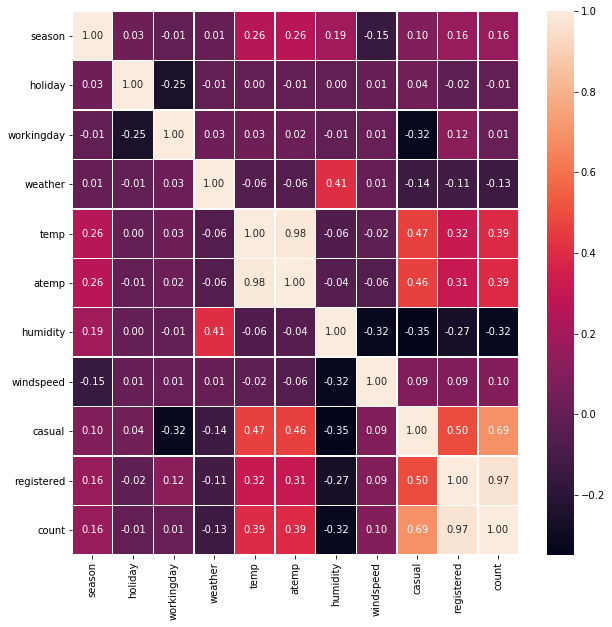

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.3)

In [11]:
# temp, atemp 가장 중요해보임
#humidity, weather 상관관계 높음


In [9]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [10]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [11]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## 시각화

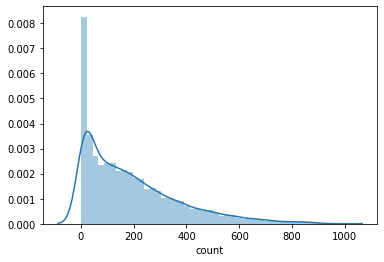

In [12]:
sns.distplot(train["count"])

In [13]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [14]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [15]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [16]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [17]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
dtype: object

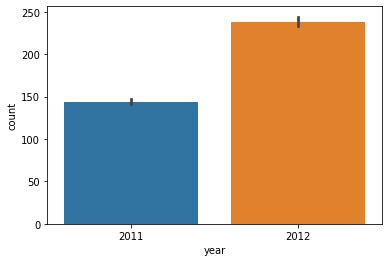

In [18]:
sns.barplot(data =train,x='year',y='count')

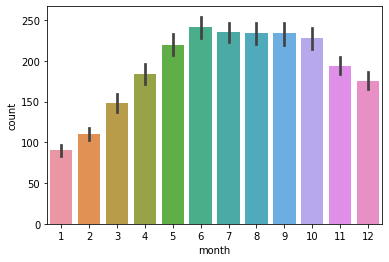

In [19]:
sns.barplot(data =train,x='month',y='count')

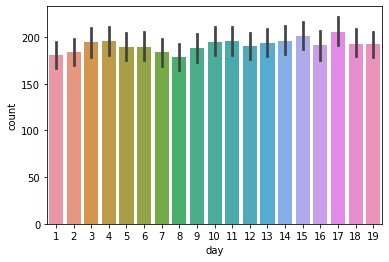

In [20]:
sns.barplot(data =train,x='day',y='count')

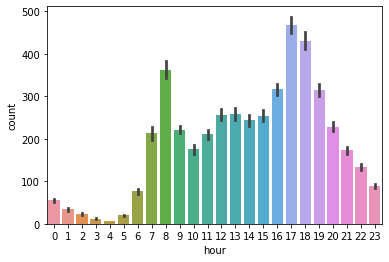

In [21]:
sns.barplot(data =train,x='hour',y='count')

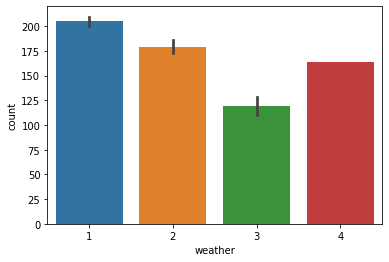

In [22]:
sns.barplot(data =train,x='weather',y='count')

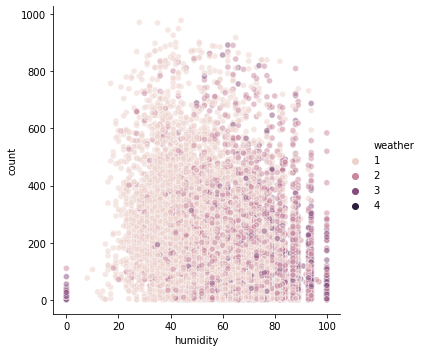

In [23]:

sns.relplot(x="humidity", y="count", data=train,alpha=.5, hue='weather')

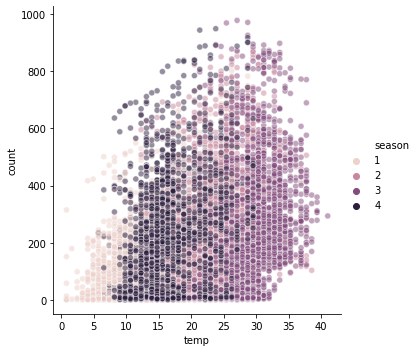

In [24]:
sns.relplot(x="temp", y="count", data=train,alpha=.5,hue='season')

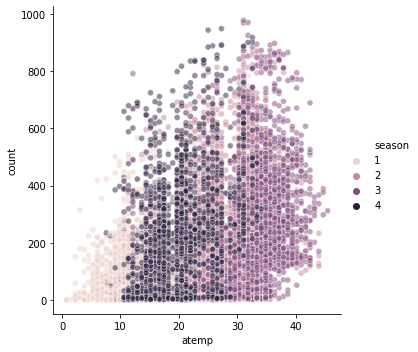

In [25]:
sns.relplot(x="atemp", y="count", data=train,alpha=.5,hue='season')

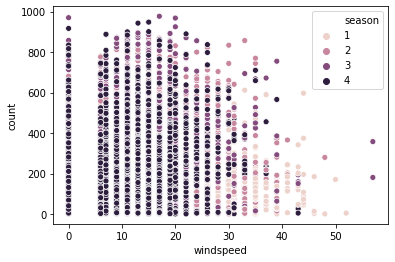

In [26]:
sns.scatterplot(x="windspeed", y="count", data=train,hue='season')

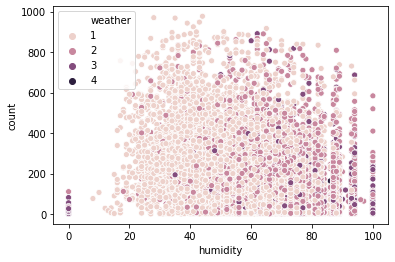

In [27]:
sns.scatterplot(x="humidity", y="count", data=train,hue='weather')

# 3. Feature engineering

In [28]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [32]:
# day 삭제

In [29]:
train = train.drop(['day'], axis=1)
test = test.drop(['day'], axis=1)

In [30]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,22


In [31]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,22


In [32]:
combine = [train,test]

In [33]:
# 년도 0,1으로변경

In [34]:
for dataset in combine:
    dataset['year'] = dataset['year'].map({2011:0, 2012:1}).astype(int)

In [35]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1,12,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,1,12,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,1,12,22


In [36]:
#temp, atemp 10도 단위로 범주화

In [37]:
for dataset in combine:
    dataset.loc[dataset['temp']<=10, 'temp']=0
    dataset.loc[(dataset['temp']>10)&(dataset['temp']<=20),'temp']=1
    dataset.loc[(dataset['temp']>20)&(dataset['temp']<=30),'temp']=2
    dataset.loc[dataset['temp']>30,'temp']=3

In [38]:
for dataset in combine:
    dataset.loc[dataset['atemp']<=10, 'atemp']=0
    dataset.loc[(dataset['atemp']>10)&(dataset['atemp']<=20),'atemp']=1
    dataset.loc[(dataset['atemp']>20)&(dataset['atemp']<=30),'atemp']=2
    dataset.loc[dataset['atemp']>30,'atemp']=3

In [39]:
# month 5-10월: 0 , 그 외: 1

In [40]:
month_0 = [i for i in range(5,11)]

In [41]:
month_0

[5, 6, 7, 8, 9, 10]

In [42]:
for i in range(len(train)):
    if train['month'][i] in month_0:
        train['month'][i]=1
    else:
        train['month'][i]=0

C:\Users\82104\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\82104\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
for i in range(len(test)):
    if test['month'][i] in month_0:
        test['month'][i]=1
    else:
        test['month'][i]=0

C:\Users\82104\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\82104\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,0.0,1.0,81,0.0000,3,13,16,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,0.0,1.0,80,0.0000,8,32,40,0,0,1
2,2011-01-01 02:00:00,1,0,0,1,0.0,1.0,80,0.0000,5,27,32,0,0,2
3,2011-01-01 03:00:00,1,0,0,1,0.0,1.0,75,0.0000,3,10,13,0,0,3
4,2011-01-01 04:00:00,1,0,0,1,0.0,1.0,75,0.0000,0,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,1.0,1.0,50,26.0027,7,329,336,1,0,19
10882,2012-12-19 20:00:00,4,0,1,1,1.0,1.0,57,15.0013,10,231,241,1,0,20
10883,2012-12-19 21:00:00,4,0,1,1,1.0,1.0,61,15.0013,4,164,168,1,0,21
10884,2012-12-19 22:00:00,4,0,1,1,1.0,1.0,61,6.0032,12,117,129,1,0,22


In [45]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,2011-01-20 00:00:00,1,0,1,1,1.0,1.0,56,26.0027,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,1.0,1.0,56,0.0000,0,0,1
2,2011-01-20 02:00:00,1,0,1,1,1.0,1.0,56,0.0000,0,0,2
3,2011-01-20 03:00:00,1,0,1,1,1.0,1.0,56,11.0014,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,1.0,1.0,56,11.0014,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,1.0,1.0,60,11.0014,1,0,19
6489,2012-12-31 20:00:00,1,0,1,2,1.0,1.0,60,11.0014,1,0,20
6490,2012-12-31 21:00:00,1,0,1,1,1.0,1.0,60,11.0014,1,0,21
6491,2012-12-31 22:00:00,1,0,1,1,1.0,1.0,56,8.9981,1,0,22


In [50]:
#humidity 삭제

In [46]:
train = train.drop(['humidity'], axis=1)
test = test.drop(['humidity'], axis=1)

In [47]:
combine = [train, test]

In [53]:
# windspeed 범주화

In [48]:
for dataset in combine:
    dataset.loc[dataset['windspeed']<=10, 'windspeed']=0
    dataset.loc[(dataset['windspeed']>10)&(dataset['windspeed']<=20),'windspeed']=1
    dataset.loc[(dataset['windspeed']>20)&(dataset['windspeed']<=30),'windspeed']=2
    dataset.loc[(dataset['windspeed']>30)&(dataset['windspeed']<=40),'windspeed']=3
    dataset.loc[dataset['windspeed']>40,'windspeed']=4

In [49]:
train['temp'] = train['temp'].astype(int)
train['atemp'] = train['atemp'].astype(int)

test['temp'] = test['temp'].astype(int)
test['atemp'] = test['atemp'].astype(int)

# 4. modeling

In [50]:
train['windspeed'] = train['windspeed'].astype(int)

test['windspeed'] = test['windspeed'].astype(int)

In [51]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,0,1,0,3,13,16,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,0,1,0,8,32,40,0,0,1
2,2011-01-01 02:00:00,1,0,0,1,0,1,0,5,27,32,0,0,2
3,2011-01-01 03:00:00,1,0,0,1,0,1,0,3,10,13,0,0,3
4,2011-01-01 04:00:00,1,0,0,1,0,1,0,0,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,1,1,2,7,329,336,1,0,19
10882,2012-12-19 20:00:00,4,0,1,1,1,1,1,10,231,241,1,0,20
10883,2012-12-19 21:00:00,4,0,1,1,1,1,1,4,164,168,1,0,21
10884,2012-12-19 22:00:00,4,0,1,1,1,1,0,12,117,129,1,0,22


In [52]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,windspeed,year,month,hour
0,2011-01-20 00:00:00,1,0,1,1,1,1,2,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,1,1,0,0,0,1
2,2011-01-20 02:00:00,1,0,1,1,1,1,0,0,0,2
3,2011-01-20 03:00:00,1,0,1,1,1,1,1,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,1,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,1,1,1,1,0,19
6489,2012-12-31 20:00:00,1,0,1,2,1,1,1,1,0,20
6490,2012-12-31 21:00:00,1,0,1,1,1,1,1,1,0,21
6491,2012-12-31 22:00:00,1,0,1,1,1,1,0,1,0,22


In [53]:
X_train = train[['season','holiday','workingday','weather','temp','atemp','windspeed','year','month','hour']]
Y_train = train['count']
X_test = test.drop('datetime',axis=1).copy()
                      
X_train.shape, Y_train.shape, X_test.shape

((10886, 10), (10886,), (6493, 10))

In [54]:
X_train

,season,holiday,workingday,weather,temp,atemp,windspeed,year,month,hour
0,1,0,0,1,0,1,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1
2,1,0,0,1,0,1,0,0,0,2
3,1,0,0,1,0,1,0,0,0,3
4,1,0,0,1,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,1,1,2,1,0,19
10882,4,0,1,1,1,1,1,1,0,20
10883,4,0,1,1,1,1,1,1,0,21
10884,4,0,1,1,1,1,0,1,0,22


In [55]:
X_test

,season,holiday,workingday,weather,temp,atemp,windspeed,year,month,hour
0,1,0,1,1,1,1,2,0,0,0
1,1,0,1,1,1,1,0,0,0,1
2,1,0,1,1,1,1,0,0,0,2
3,1,0,1,1,1,1,1,0,0,3
4,1,0,1,1,1,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,1,1,1,1,0,19
6489,1,0,1,2,1,1,1,1,0,20
6490,1,0,1,1,1,1,1,1,0,21
6491,1,0,1,1,1,1,0,1,0,22


In [56]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Linear Regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

linear = linear_model.LinearRegression()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
acc_linear = round(linear.score(X_train, Y_train)*100,2)
acc_linear

36.16

## Decision Tree

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)
acc_decision_tree

58.35

## Random Forest

In [60]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

58.35

## xgboost

In [61]:
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn import model_selection

In [84]:
"""xg_boost = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
       """

In [62]:
xg_boost = xgboost.XGBClassifier()

In [63]:
xg_boost.fit(X_train, Y_train)
Y_pred = xg_boost.predict(X_test)
acc_xg_boost = round(xg_boost.score(X_train, Y_train)*100,2)
acc_xg_boost

56.1

# knn

In [65]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)
acc_knn

29.35

## Lgbm

In [66]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)
Y_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, Y_train)*100,2)
acc_lgbm

0.98

In [87]:
Y_pred = random_forest.predict(X_test)

In [89]:
submission = pd.DataFrame({
        "datetime": test["datetime"],
        "count": Y_pred
    })
submission.to_csv('final_submission.csv', index=False)